In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from warnings import filterwarnings
filterwarnings("ignore")


In [11]:
# 🔹 Mount your Google Drive if the dataset is there (optional)
# from google.colab import drive
# drive.mount('/content/drive')

# 🔹 Load dataset
# Change this path if needed (e.g., '/content/drive/MyDrive/PublicStatistics_Dataset.xlsx')
DATA_PATH = "D:\StudentGraduateLevel\PublicStatistics_Dataset.xlsx"
df = pd.read_excel(DATA_PATH)

In [12]:
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
display(df.head())


Dataset loaded successfully!
Shape: (500, 22)


,Province,Year,types of schools,Number of Schools,Enrollment_Total,Enrollment_Girl,Repeaters_Total,Repeaters_Girl,TeachingStaff_Total,TeachingStaff_Girl,...,Total Staff,TotalFemaleStaff,Student Graduated,Staff_Primary,Staff_L_Sec,Staff_U_Sec,Staff_Graduate,Staff_PostGrad,Staff_PhD,Teacher_Qual_Total
0,Banteay Meanchey,2020,preschool,326,17609,8732,0,0,86,86,...,107,107,17609,3,0,0,9,0,0,12
1,Banteay Meanchey,2020,primary school,408,97157,46850,3469,1160,2924,1679,...,3483,1787,12227,68,0,0,381,11,0,460
2,Banteay Meanchey,2020,secondary school,56,13945,7456,238,66,531,235,...,658,271,5584,1,0,0,233,19,0,253
3,Banteay Meanchey,2020,high school,84,27489,15102,585,201,1293,516,...,1480,567,1608,2,0,0,569,47,0,618
4,Battambang,2020,preschool,373,19134,9688,0,0,624,580,...,643,599,19134,14,0,0,147,5,0,166


# ===============================================
# 🔍 Basic Info & Column Detection
# ===============================================

In [13]:
print("\n--- Basic Info ---")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Province                 500 non-null    object
 1   Year                     500 non-null    int64 
 2   types of schools         500 non-null    object
 3   Number of Schools        500 non-null    int64 
 4   Enrollment_Total         500 non-null    int64 
 5   Enrollment_Girl          500 non-null    int64 
 6   Repeaters_Total          500 non-null    int64 
 7   Repeaters_Girl           500 non-null    int64 
 8   TeachingStaff_Total      500 non-null    int64 
 9   TeachingStaff_Girl       500 non-null    int64 
 10  Non-TeachingStaff_Total  500 non-null    int64 
 11  Non-TeachingStaff_Girl   500 non-null    int64 
 12  Total  Staff             500 non-null    int64 
 13  TotalFemaleStaff         500 non-null    int64 
 14  Student Graduated     

In [14]:
# Identify likely columns
student_candidates = [c for c in df.columns if "student" in c.lower() or "enroll" in c.lower()]
teacher_candidates = [c for c in df.columns if "teach" in c.lower()]
province_candidates = [c for c in df.columns if "prov" in c.lower() or "district" in c.lower()]

print("\nDetected columns:")
print("Student-related:", student_candidates)
print("Teacher-related:", teacher_candidates)
print("Province-related:", province_candidates)



Detected columns:
Student-related: ['Enrollment_Total', 'Enrollment_Girl', 'Student Graduated']
Teacher-related: ['TeachingStaff_Total', 'TeachingStaff_Girl', 'Non-TeachingStaff_Total', 'Non-TeachingStaff_Girl', 'Teacher_Qual_Total']
Province-related: ['Province']


# ===============================================
# 🔧 Select Key Columns and Clean Data
# ===============================================

In [15]:
province_col = "Province"
student_col = "Enrollment_Total"
target_col = "TeachingStaff_Total"

df_model = df[[province_col, student_col, target_col]].copy()
df_model = df_model.dropna(subset=[student_col, target_col])

print("\n✅ Cleaned dataset preview:")
display(df_model.head())


✅ Cleaned dataset preview:


,Province,Enrollment_Total,TeachingStaff_Total
0,Banteay Meanchey,17609,86
1,Banteay Meanchey,97157,2924
2,Banteay Meanchey,13945,531
3,Banteay Meanchey,27489,1293
4,Battambang,19134,624


In [16]:
# Add ratio column
df_model["student_teacher_ratio"] = df_model[student_col] / df_model[target_col]
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna(subset=["student_teacher_ratio"])

# ===============================================
# 📊 EDA and Visualization
# ===============================================

In [17]:
print("\n--- Summary Statistics ---")
display(df_model.describe())


--- Summary Statistics ---


,Enrollment_Total,TeachingStaff_Total,student_teacher_ratio
count,497.000000,497.000000,497.000000
mean,33005.734406,801.678068,113.833457
std,40655.854443,917.385468,410.998562
min,776.000000,1.000000,8.168421
25%,7498.000000,161.000000,23.535234
50%,16684.000000,453.000000,34.262682
75%,37390.000000,1127.000000,53.863977
max,171522.000000,4925.000000,7103.500000


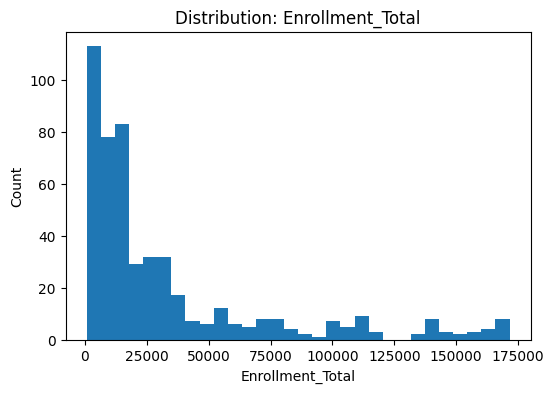

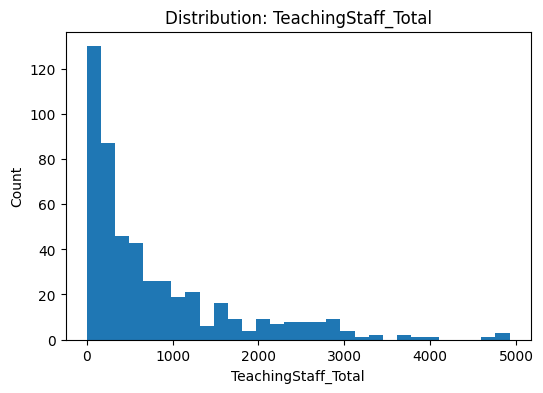

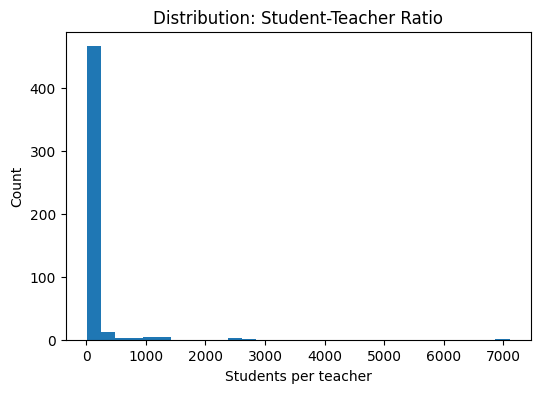

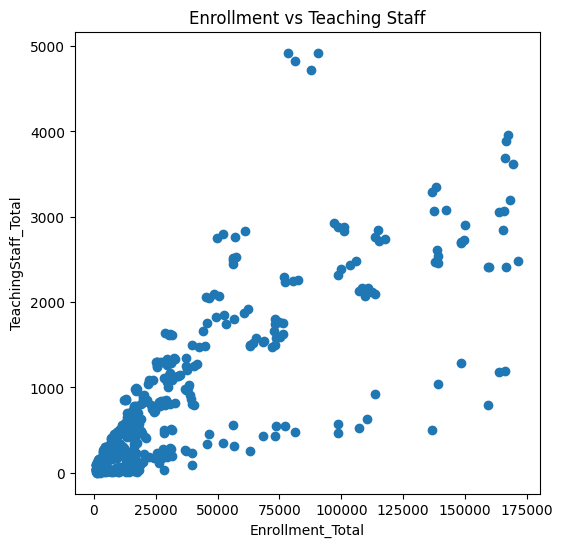

In [18]:
# Histograms
plt.figure(figsize=(6,4))
plt.hist(df_model[student_col], bins=30)
plt.title("Distribution: Enrollment_Total")
plt.xlabel("Enrollment_Total")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df_model[target_col], bins=30)
plt.title("Distribution: TeachingStaff_Total")
plt.xlabel("TeachingStaff_Total")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df_model["student_teacher_ratio"], bins=30)
plt.title("Distribution: Student-Teacher Ratio")
plt.xlabel("Students per teacher")
plt.ylabel("Count")
plt.show()

# Scatter
plt.figure(figsize=(6,6))
plt.scatter(df_model[student_col], df_model[target_col])
plt.xlabel("Enrollment_Total")
plt.ylabel("TeachingStaff_Total")
plt.title("Enrollment vs Teaching Staff")
plt.show()

In [19]:
# Correlation
print("\n--- Correlation ---")
print(df_model[[student_col, target_col, "student_teacher_ratio"]].corr())



--- Correlation ---
                       Enrollment_Total  TeachingStaff_Total  \
Enrollment_Total               1.000000             0.799681   
TeachingStaff_Total            0.799681             1.000000   
student_teacher_ratio         -0.061883            -0.154808   

                       student_teacher_ratio  
Enrollment_Total                   -0.061883  
TeachingStaff_Total                -0.154808  
student_teacher_ratio               1.000000  


In [20]:
# Group by province
province_stats = df_model.groupby(province_col).agg({
    student_col: "sum",
    target_col: "sum"
}).reset_index()

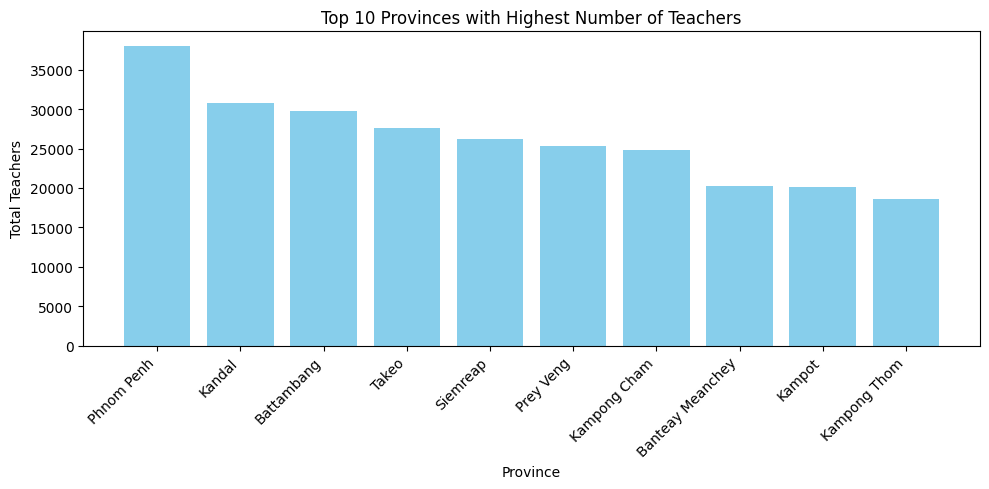

In [21]:
# 1️ Top 10 provinces with the highest number of teachers
top10_teachers = province_stats.sort_values(by=target_col, ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_teachers[province_col], top10_teachers[target_col], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Provinces with Highest Number of Teachers")
plt.xlabel("Province")
plt.ylabel("Total Teachers")
plt.tight_layout()
plt.show()

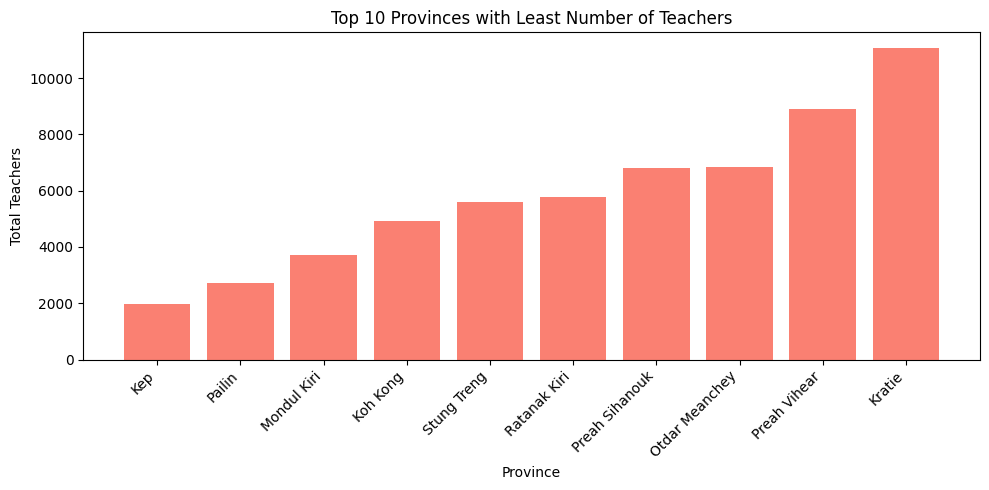

In [22]:
# 2️ Top 10 provinces with the least number of teachers
bottom10_teachers = province_stats.sort_values(by=target_col, ascending=True).head(10)
plt.figure(figsize=(10,5))
plt.bar(bottom10_teachers[province_col], bottom10_teachers[target_col], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Provinces with Least Number of Teachers")
plt.xlabel("Province")
plt.ylabel("Total Teachers")
plt.tight_layout()
plt.show()

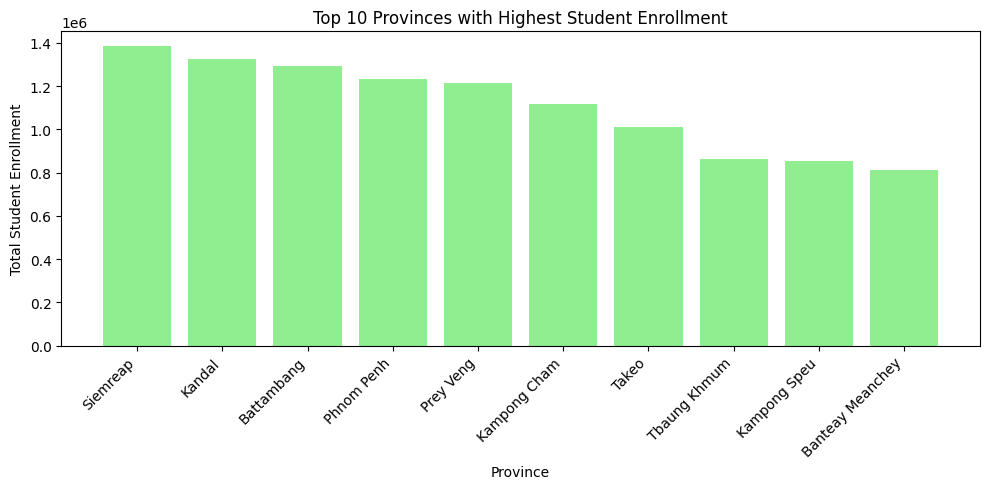

In [23]:
# 3️ Top 10 provinces with the highest number of student enrollments
top10_students = province_stats.sort_values(by=student_col, ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_students[province_col], top10_students[student_col], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Provinces with Highest Student Enrollment")
plt.xlabel("Province")
plt.ylabel("Total Student Enrollment")
plt.tight_layout()
plt.show()

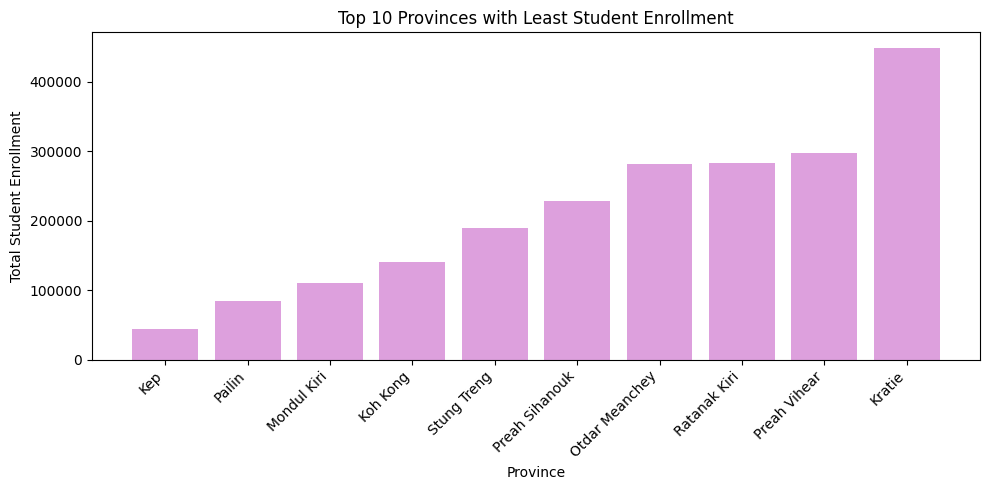

In [24]:
# 4️ Top 10 provinces with the least number of student enrollments
bottom10_students = province_stats.sort_values(by=student_col, ascending=True).head(10)
plt.figure(figsize=(10,5))
plt.bar(bottom10_students[province_col], bottom10_students[student_col], color='plum')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Provinces with Least Student Enrollment")
plt.xlabel("Province")
plt.ylabel("Total Student Enrollment")
plt.tight_layout()
plt.show()


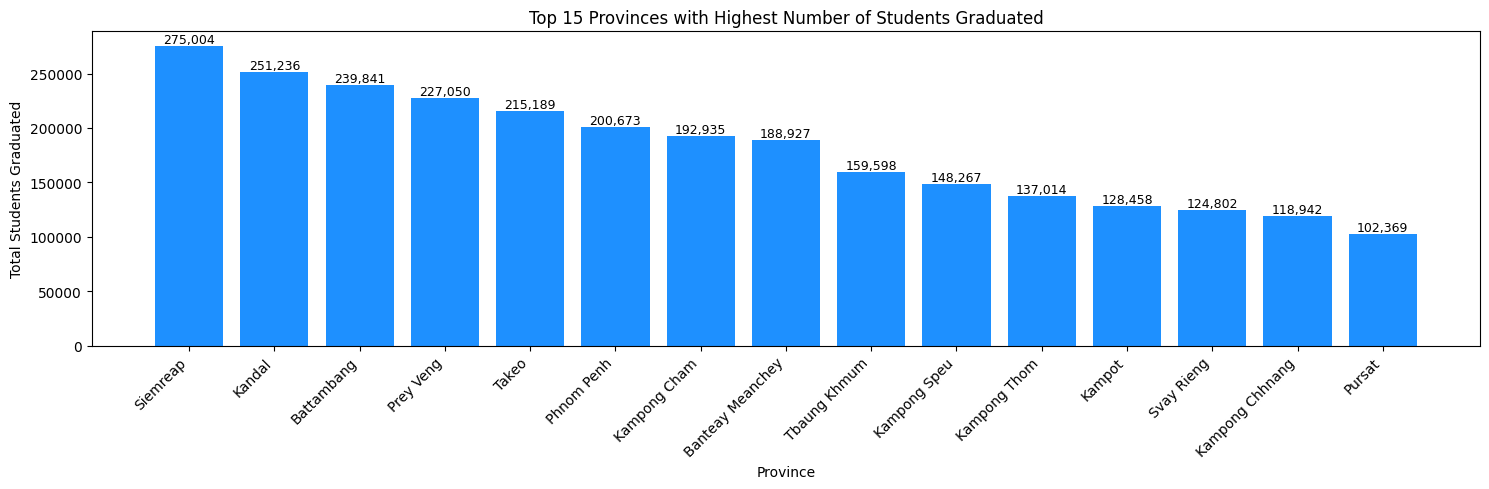

In [25]:
# ===============================================
# Top 15 Provinces by Number of Students Graduated
# ===============================================

# Check column name (make sure it matches your dataset)
grad_col = "Student Graduated"  # <-- change this if your dataset uses a slightly different name

# Group by province and sum up graduates
province_grad = df.groupby(province_col).agg({grad_col: "sum"}).reset_index()

# Sort from highest to lowest
top15_grad = province_grad.sort_values(by=grad_col, ascending=False).head(15)

# Plot
plt.figure(figsize=(15,5))
bars = plt.bar(top15_grad[province_col], top15_grad[grad_col], color="dodgerblue")
plt.title("Top 15 Provinces with Highest Number of Students Graduated")
plt.xlabel("Province")
plt.ylabel("Total Students Graduated")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=9)

plt.show()

In [26]:
# ===============================================
# 📆 Time Series Analysis
# ===============================================

# 🔹 Make sure your dataset has a column for the year
# Adjust if your dataset uses another name like 'Year' or 'Academic Year'
year_col = "Year"

# 🔹 Make sure column names match your dataset
teacher_col = "TeachingStaff_Total"
enroll_col = "Enrollment_Total"
grad_col = "Student Graduated"

# --- Check available columns ---
print("Available columns:", df.columns.tolist())

# --- Group data by year ---
yearly_data = df.groupby(year_col).agg({
    teacher_col: "sum",
    enroll_col: "sum",
    grad_col: "sum"
}).reset_index()

Available columns: ['Province', 'Year', 'types of schools', 'Number of Schools', 'Enrollment_Total', 'Enrollment_Girl', 'Repeaters_Total', 'Repeaters_Girl', 'TeachingStaff_Total', 'TeachingStaff_Girl', 'Non-TeachingStaff_Total', 'Non-TeachingStaff_Girl', 'Total  Staff', 'TotalFemaleStaff', 'Student Graduated', 'Staff_Primary', 'Staff_L_Sec', 'Staff_U_Sec', 'Staff_Graduate', 'Staff_PostGrad', 'Staff_PhD', 'Teacher_Qual_Total']


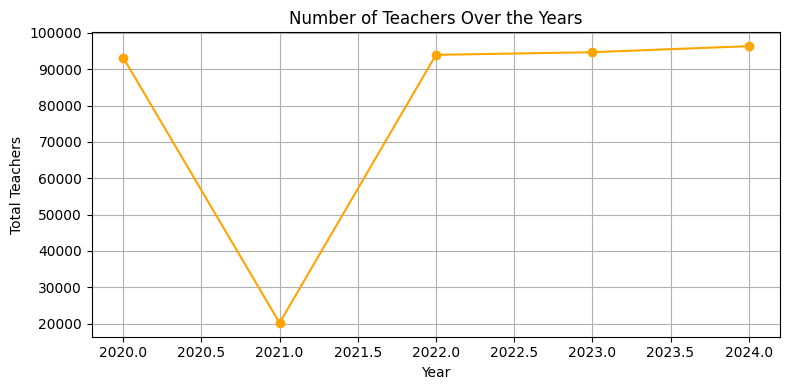

In [27]:
# --- Plot 1: Teachers over the years ---
plt.figure(figsize=(8,4))
plt.plot(yearly_data[year_col], yearly_data[teacher_col], marker='o', color='orange')
plt.title("Number of Teachers Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Teachers")
plt.grid(True)
plt.tight_layout()
plt.show()

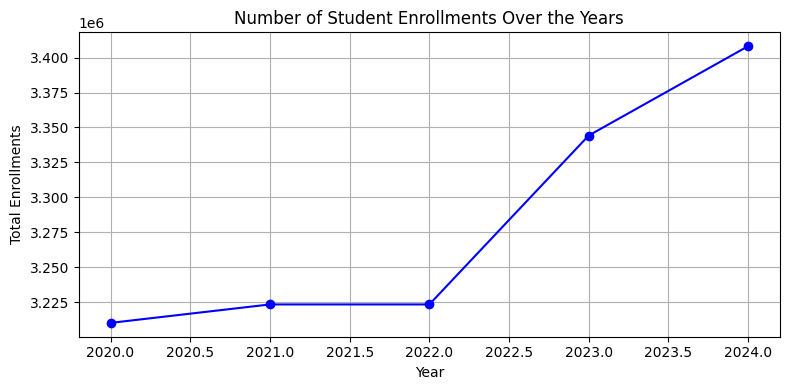

In [28]:
# --- Plot 2: Student Enrollment over the years ---
plt.figure(figsize=(8,4))
plt.plot(yearly_data[year_col], yearly_data[enroll_col], marker='o', color='blue')
plt.title("Number of Student Enrollments Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Enrollments")
plt.grid(True)
plt.tight_layout()
plt.show()

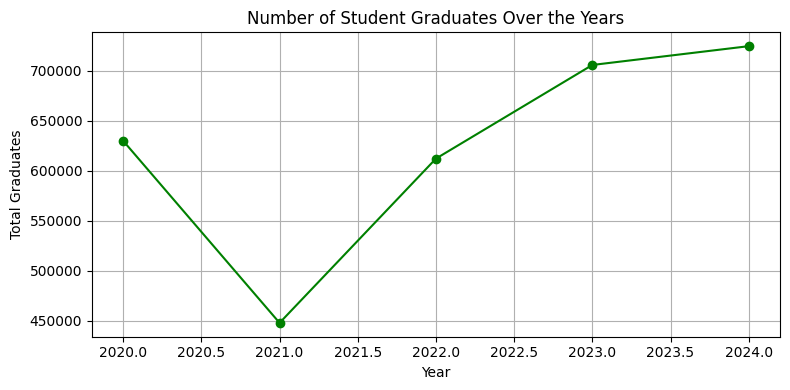

In [29]:
# --- Plot 3: Student Graduates over the years ---
plt.figure(figsize=(8,4))
plt.plot(yearly_data[year_col], yearly_data[grad_col], marker='o', color='green')
plt.title("Number of Student Graduates Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Graduates")
plt.grid(True)
plt.tight_layout()
plt.show()


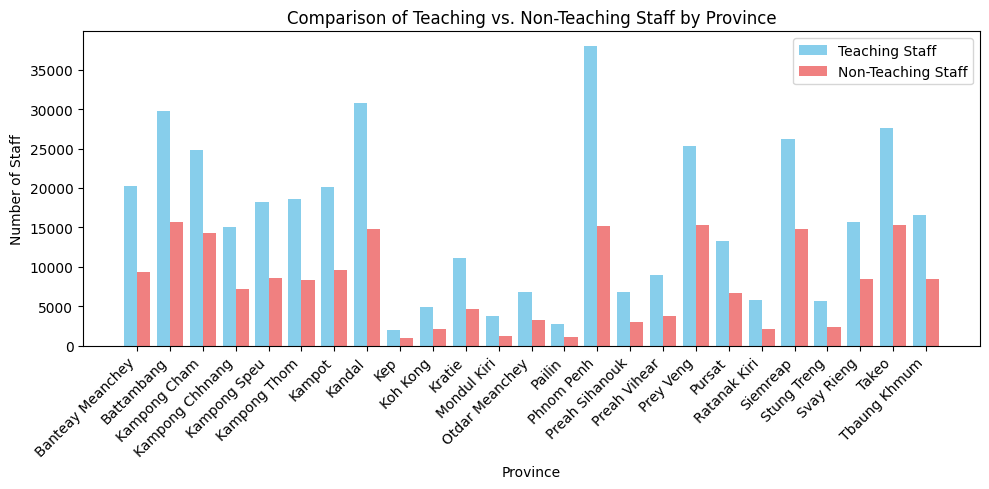

In [30]:
# ===============================================
# Comparison: Teaching vs. Non-Teaching Staff
# ===============================================

# 🔹 Make sure the column names match your dataset
teach_col = "TeachingStaff_Total"
nonteach_col = "Non-TeachingStaff_Total"

# 🔹 Group by province to get total staff counts per province
staff_comparison = df.groupby(province_col).agg({
    teach_col: "sum",
    nonteach_col: "sum"
}).reset_index()

# --- Plot comparison ---
plt.figure(figsize=(10,5))
x = range(len(staff_comparison))

plt.bar(x, staff_comparison[teach_col], width=0.4, label="Teaching Staff", color="skyblue")
plt.bar(
    [i + 0.4 for i in x],
    staff_comparison[nonteach_col],
    width=0.4,
    label="Non-Teaching Staff",
    color="lightcoral"
)

plt.title("Comparison of Teaching vs. Non-Teaching Staff by Province")
plt.xlabel("Province")
plt.ylabel("Number of Staff")
plt.xticks([i + 0.2 for i in x], staff_comparison[province_col], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


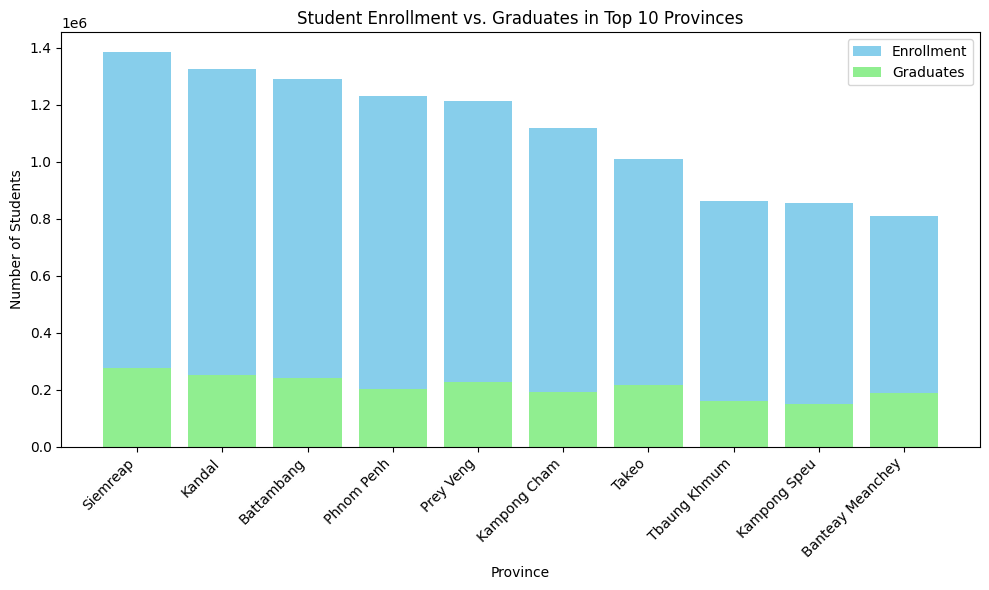

In [31]:
province_col = "Province"
enroll_col = "Enrollment_Total"
graduate_col = "Student Graduated"

# 🔹 Group by province and get totals
student_data = df.groupby(province_col).agg({
    enroll_col: "sum",
    graduate_col: "sum"
}).reset_index()

# 🔹 Get top 10 provinces by enrollment
top10 = student_data.sort_values(by=enroll_col, ascending=False).head(10)

# --- Plot stacked bar chart ---
plt.figure(figsize=(10,6))
x = range(len(top10))

plt.bar(x, top10[enroll_col], label="Enrollment", color="skyblue")
plt.bar(x, top10[graduate_col], bottom=top10[enroll_col]*0.0, label="Graduates", color="lightgreen")

# 🔹 Optional: stacked style (if you want them actually stacked)
# plt.bar(x, top10[enroll_col], label="Enrollment", color="skyblue")
# plt.bar(x, top10[graduate_col], bottom=top10[enroll_col], label="Graduates", color="lightgreen")

plt.title("Student Enrollment vs. Graduates in Top 10 Provinces")
plt.xlabel("Province")
plt.ylabel("Number of Students")
plt.xticks(x, top10[province_col], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================================
# 🧠 Train-Test Split and Model Training
# ===============================================

In [32]:
target_col = "TeachingStaff_Total"         # your target column
assert target_col in df.columns, f"Target '{target_col}' not found. Columns: {df.columns.tolist()}"

In [33]:
# Drop rows with missing target
df = df.dropna(subset=[target_col])

# Features/target
feature_cols = [c for c in df.columns if c != target_col]
X = df[feature_cols].copy()
y = df[target_col].copy()

In [34]:
# Coerce categoricals to string (prevents int/str mix issues)
for c in X.columns:
    if X[c].dtype == "object":
        X[c] = X[c].astype("string")

# Optional: try to coerce numeric-like text to numbers
for c in X.columns:
    if X[c].dtype in ["float64", "int64", "boolean"]:
        continue
    # if a column looks numeric-like (most values parse), convert to numeric
    try:
        parsed = pd.to_numeric(X[c], errors="raise")
        # If it succeeds for all, keep numeric
        X[c] = parsed
    except Exception:
        # keep as string if not purely numeric
        pass

In [35]:
# 2) Column selectors
# -----------------------------
cat_cols = X.select_dtypes(include=["string", "object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number, "boolean"]).columns.tolist()

In [36]:
# 3) Preprocessors
# For linear/tree models: impute categoricals then one-hot; pass numeric through with imputation
pre_basic = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
        ]), num_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
        ]), cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# For SVR/MLP: scale numeric (after impute) + one-hot categoricals
pre_scaled = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
        ]), cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

In [37]:
# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# 5) Pipelines per model
pipelines = {
    "Linear Regression": Pipeline([
        ("pre", pre_basic),
        ("model", LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ("pre", pre_basic),
        ("model", RandomForestRegressor(n_estimators=300, random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ("pre", pre_basic),
        ("model", GradientBoostingRegressor(random_state=42))
    ]),
    "SVR (RBF)": Pipeline([
        ("pre", pre_scaled),
        ("model", SVR(kernel="rbf", C=10.0, epsilon=0.1))
    ]),
    "Neural Network": Pipeline([
        ("pre", pre_scaled),
        ("model", MLPRegressor(hidden_layer_sizes=(64, 32),
                               activation="relu",
                               max_iter=1000,
                               random_state=42))
    ]),
}

In [39]:
# 6) Fit & report R²
# -----------------------------
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    print(f"{name} Accuracy (R²): {r2:.3f}")

Linear Regression Accuracy (R²): 0.958
Random Forest Accuracy (R²): 0.993
Gradient Boosting Accuracy (R²): 0.993
SVR (RBF) Accuracy (R²): 0.264
Neural Network Accuracy (R²): 0.955


# ===============================================
# 📈 Model Evaluation
# ===============================================

In [40]:
def eval_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


In [41]:
def eval_model(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred)
    }

# Evaluate all models from the dictionary
rows = []
for name, pipe in pipelines.items():
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    tr = eval_model(y_train, y_pred_train)
    te = eval_model(y_test, y_pred_test)

    rows.append({
        "Model": name,
        "R2_train": tr["R2"], "MSE_train": tr["MSE"], "RMSE_train": tr["RMSE"], "MAE_train": tr["MAE"],
        "R2_test": te["R2"], "MSE_test": te["MSE"], "RMSE_test": te["RMSE"], "MAE_test": te["MAE"],
    })

# Create DataFrame
metrics_df = pd.DataFrame(rows).set_index("Model").round(4)

print(metrics_df)

                   R2_train    MSE_train  RMSE_train  MAE_train  R2_test  \
Model                                                                      
Linear Regression    0.9999     119.6994     10.9407     5.9133   0.9583   
Random Forest        0.9993     581.7146     24.1188    13.2813   0.9934   
Gradient Boosting    0.9994     510.8805     22.6027    17.6842   0.9928   
SVR (RBF)            0.2100  703028.0855    838.4677   481.6640   0.2639   
Neural Network       0.9970    2681.4138     51.7824    23.6963   0.9549   

                      MSE_test  RMSE_test  MAE_test  
Model                                                
Linear Regression   26385.5837   162.4364   75.4309  
Random Forest        4146.8439    64.3960   35.8919  
Gradient Boosting    4540.4173    67.3826   42.7197  
SVR (RBF)          465992.8400   682.6367  430.5354  
Neural Network      28526.8665   168.8990  118.5486  


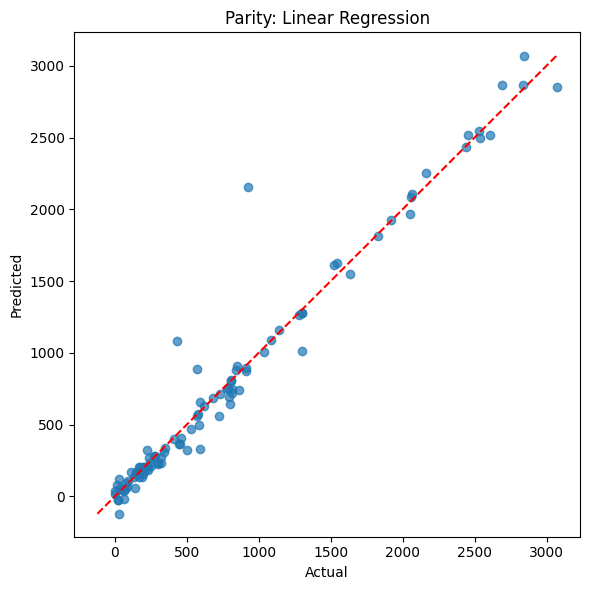

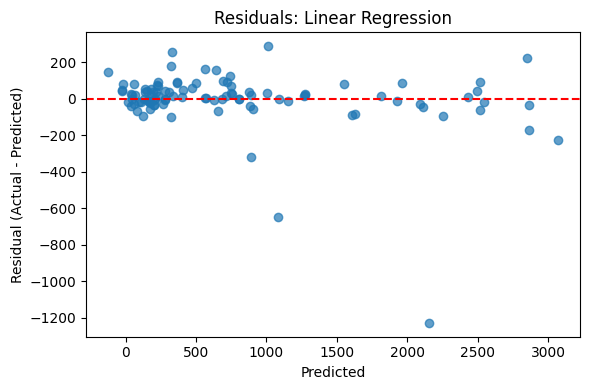

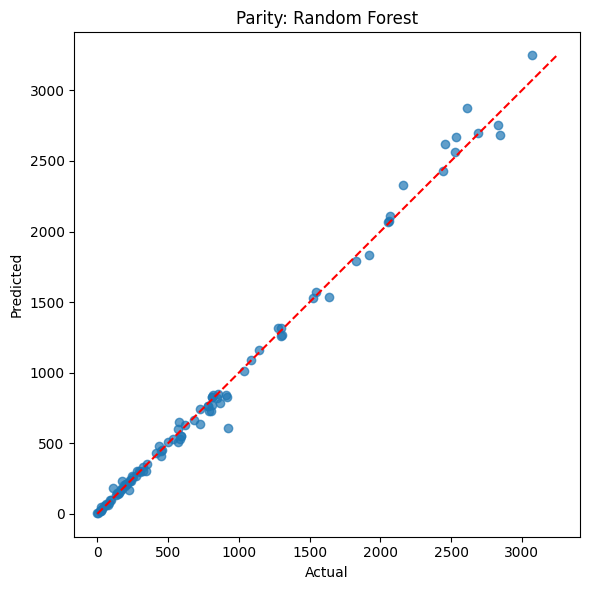

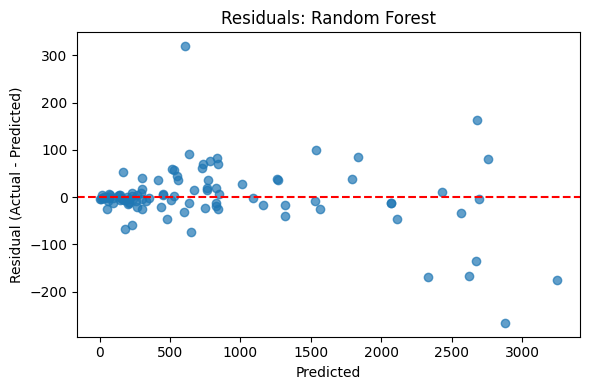

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def parity_plot(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    mn, mx = min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def residual_plot(y_true, y_pred, title):
    resid = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, resid, alpha=0.7)
    plt.axhline(0, linestyle='--', color='r')
    plt.xlabel("Predicted")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# --- Plot for Linear Regression ---
y_pred_lr = pipelines["Linear Regression"].predict(X_test)
parity_plot(y_test, y_pred_lr, "Parity: Linear Regression")
residual_plot(y_test, y_pred_lr, "Residuals: Linear Regression")

# --- Plot for Random Forest ---
y_pred_rf = pipelines["Random Forest"].predict(X_test)
parity_plot(y_test, y_pred_rf, "Parity: Random Forest")
residual_plot(y_test, y_pred_rf, "Residuals: Random Forest")


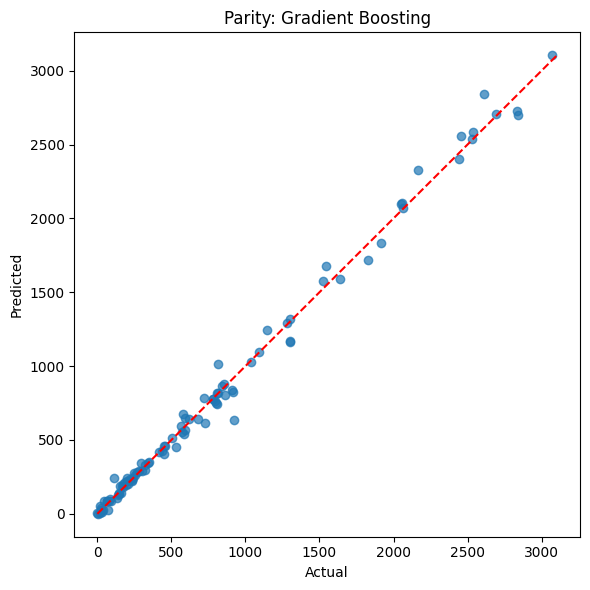

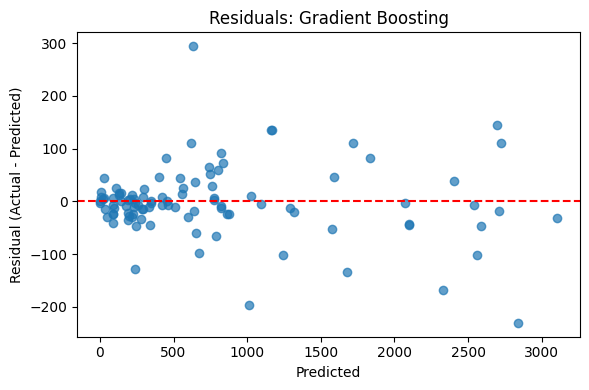

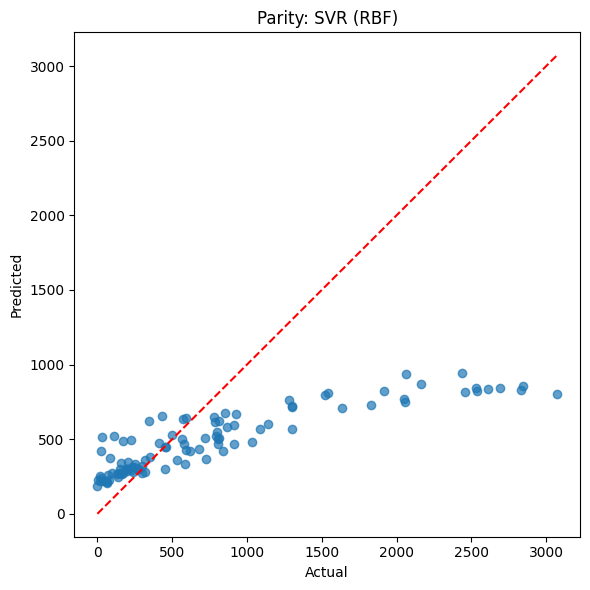

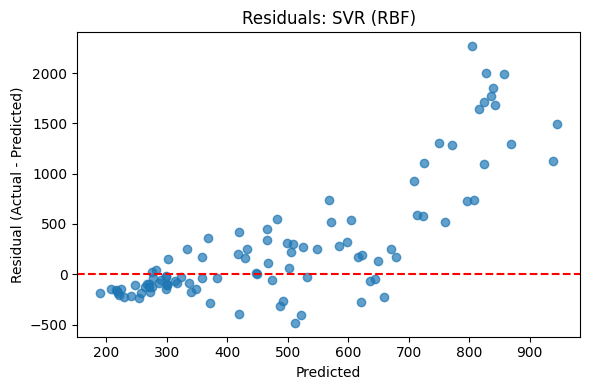

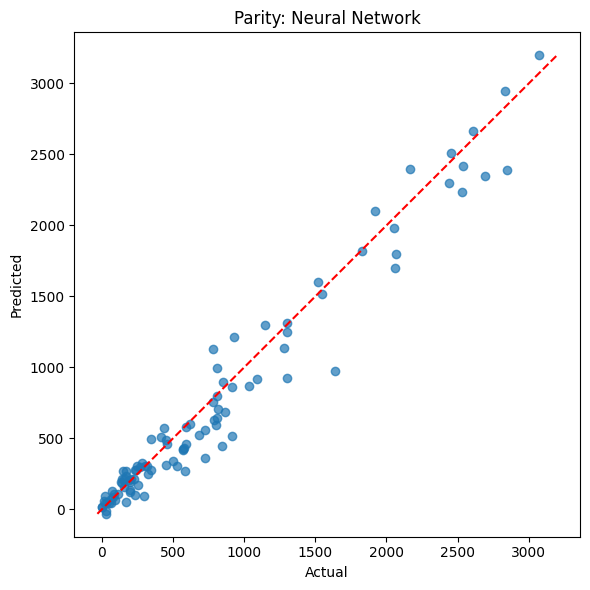

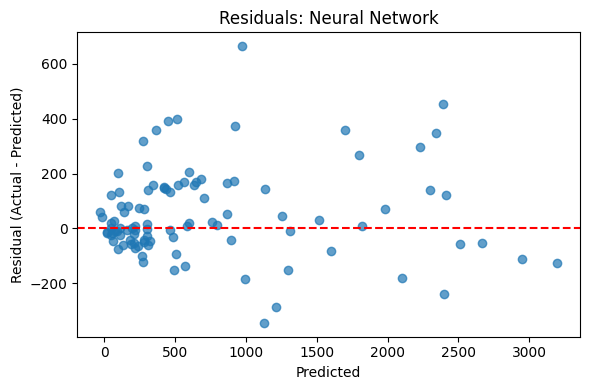

In [43]:
# --- Gradient Boosting ---
y_pred_gb = pipelines["Gradient Boosting"].predict(X_test)
parity_plot(y_test, y_pred_gb, "Parity: Gradient Boosting")
residual_plot(y_test, y_pred_gb, "Residuals: Gradient Boosting")

# --- SVR (RBF) ---
y_pred_svr = pipelines["SVR (RBF)"].predict(X_test)
parity_plot(y_test, y_pred_svr, "Parity: SVR (RBF)")
residual_plot(y_test, y_pred_svr, "Residuals: SVR (RBF)")

# --- Neural Network ---
y_pred_mlp = pipelines["Neural Network"].predict(X_test)
parity_plot(y_test, y_pred_mlp, "Parity: Neural Network")
residual_plot(y_test, y_pred_mlp, "Residuals: Neural Network")


# ===============================================
# 🌟 Feature Importance and Prediction Function
# ===============================================

In [44]:
rf_pipe = pipelines["Random Forest"]   # or use your variable `pipe_rf` if you have it

pre = rf_pipe.named_steps["pre"]
model = rf_pipe.named_steps["model"]

# Grab original column lists you built earlier
# (from your preprocessing step)
num_cols_used = num_cols
cat_cols_used = cat_cols

# Get the fitted OneHotEncoder (it might be wrapped in a Pipeline under "cat")
cat_tf = pre.named_transformers_.get("cat")
ohe = getattr(cat_tf, "named_steps", {}).get("ohe", cat_tf)  # handles Pipeline or direct OHE

# Build feature name list: numeric + expanded categorical
cat_feature_names = ohe.get_feature_names_out(cat_cols_used) if ohe is not None else np.array([])
feature_names = list(num_cols_used) + list(cat_feature_names)

# Match lengths defensively
importances = model.feature_importances_
assert len(importances) == len(feature_names), \
    f"Length mismatch: {len(importances)} importances vs {len(feature_names)} features."

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\n--- RandomForest Feature Importances (top 20) ---")
display(feat_imp.head(20))


--- RandomForest Feature Importances (top 20) ---


TeachingStaff_Girl                 0.796710
Total  Staff                       0.177900
TotalFemaleStaff                   0.009394
Staff_Graduate                     0.003519
Number of Schools                  0.001374
Non-TeachingStaff_Total            0.001288
Enrollment_Girl                    0.001140
Enrollment_Total                   0.001132
Student Graduated                  0.001055
Repeaters_Girl                     0.001053
Repeaters_Total                    0.000975
types of schools_high school       0.000810
types of schools_primary school    0.000787
Non-TeachingStaff_Girl             0.000784
Staff_Primary                      0.000418
Province_Phnom Penh                0.000274
Province_Battambang                0.000266
Staff_PhD                          0.000146
Year                               0.000089
Staff_PostGrad                     0.000065
dtype: float64

In [45]:
def feature_series_from_pipeline(pipe, num_cols, cat_cols):
    pre = pipe.named_steps["pre"]
    mdl = pipe.named_steps["model"]

    cat_tf = pre.named_transformers_.get("cat")
    ohe = getattr(cat_tf, "named_steps", {}).get("ohe", cat_tf)

    cat_feature_names = ohe.get_feature_names_out(cat_cols) if ohe is not None else np.array([])
    feature_names = list(num_cols) + list(cat_feature_names)

    if hasattr(mdl, "feature_importances_"):
        values = mdl.feature_importances_
        name = "importance"
    elif hasattr(mdl, "coef_"):
        values = np.ravel(mdl.coef_)
        name = "coefficient"
    else:
        raise AttributeError("Model has neither feature_importances_ nor coef_.")

    assert len(values) == len(feature_names), \
        f"Length mismatch: {len(values)} vs {len(feature_names)}."

    return pd.Series(values, index=feature_names).sort_values(key=np.abs, ascending=False), name

# Examples:
rf_series, kind = feature_series_from_pipeline(pipelines["Random Forest"], num_cols, cat_cols)
print(f"\nRandom Forest ({kind}) — top 20")
display(rf_series.head(20))

lr_series, kind = feature_series_from_pipeline(pipelines["Linear Regression"], num_cols, cat_cols)
print(f"\nLinear Regression ({kind}) — top 20 by |coef|")
display(lr_series.head(20))



Random Forest (importance) — top 20


TeachingStaff_Girl                 0.796710
Total  Staff                       0.177900
TotalFemaleStaff                   0.009394
Staff_Graduate                     0.003519
Number of Schools                  0.001374
Non-TeachingStaff_Total            0.001288
Enrollment_Girl                    0.001140
Enrollment_Total                   0.001132
Student Graduated                  0.001055
Repeaters_Girl                     0.001053
Repeaters_Total                    0.000975
types of schools_high school       0.000810
types of schools_primary school    0.000787
Non-TeachingStaff_Girl             0.000784
Staff_Primary                      0.000418
Province_Phnom Penh                0.000274
Province_Battambang                0.000266
Staff_PhD                          0.000146
Year                               0.000089
Staff_PostGrad                     0.000065
dtype: float64


Linear Regression (coefficient) — top 20 by |coef|


Teacher_Qual_Total_451    -2384.749458
Teacher_Qual_Total_443    -1918.892303
Teacher_Qual_Total_450    -1737.776366
Teacher_Qual_Total_1242   -1316.711840
Teacher_Qual_Total_866     -960.915618
Teacher_Qual_Total_379     -937.873917
Teacher_Qual_Total_714     -717.798384
Teacher_Qual_Total_732     -669.671807
Teacher_Qual_Total_476     -528.622211
Teacher_Qual_Total_91      -430.548547
Teacher_Qual_Total_2709     428.662486
Teacher_Qual_Total_441     -386.316530
Teacher_Qual_Total_1601     336.631036
Teacher_Qual_Total_2297     296.489202
Teacher_Qual_Total_1134    -277.598314
Teacher_Qual_Total_881      266.707265
Teacher_Qual_Total_1308     245.370415
Teacher_Qual_Total_997      237.745740
Teacher_Qual_Total_564     -217.310710
Teacher_Qual_Total_328      206.278992
dtype: float64

# ===============================================
# 🧮 Interactive Prediction (User Input)
# ===============================================

In [46]:
# ---------- PREDICTION: use any model from `pipelines` ----------
# Assumes you already defined: pipelines (dict of fitted pipelines),
# feature_cols, province_col, enroll_col (or student_col), etc.

# Optional: alias map so users can pass short names
MODEL_ALIASES = {
    "lr": "Linear Regression",
    "linear": "Linear Regression",
    "randomforest": "Random Forest",
    "rf": "Random Forest",
    "gb": "Gradient Boosting",
    "gbr": "Gradient Boosting",
    "svr": "SVR (RBF)",
    "mlp": "Neural Network",
    "nn": "Neural Network",
}

def _resolve_model_name(model_choice: str) -> str:
    key = model_choice.strip()
    key_low = key.lower()
    if key in pipelines:
        return key
    if key_low in MODEL_ALIASES:
        name = MODEL_ALIASES[key_low]
        if name in pipelines:
            return name
    # last try: case-insensitive match
    for k in pipelines.keys():
        if k.lower() == key_low:
            return k
    raise ValueError(f"Model '{model_choice}' not found. Available: {list(pipelines.keys())}")

def predict_teachers(
    province_name: str,
    enrollment_value: float,
    model_choice: str = "Linear Regression",
) -> float:
    """
    Build a 1-row DataFrame with the SAME feature columns your pipelines were trained on,
    fill known fields (province, enrollment), leave others as NaN (preprocessor will impute),
    and predict using the selected model.
    """
    model_name = _resolve_model_name(model_choice)

    # Choose which enrollment column name to fill
    # Prefer your known variable names if you defined them earlier
    # e.g., student_col or enroll_col
    cand_enroll_cols = [c for c in [globals().get("student_col"), globals().get("enroll_col")] if c]
    if not cand_enroll_cols:
        # fallback heuristics
        cand_enroll_cols = [c for c in feature_cols if "enroll" in c.lower() or "student" in c.lower()]
    if not cand_enroll_cols:
        raise ValueError("Could not infer the enrollment column. Set `student_col` or `enroll_col`.")

    enroll_target_col = cand_enroll_cols[0]

    # Build blank row with the exact training feature columns
    X_new = pd.DataFrame([{c: pd.NA for c in feature_cols}])

    # Fill what we know
    if "province_col" in globals() and province_col in feature_cols:
        X_new.at[0, province_col] = province_name
    elif "province" in [c.lower() for c in feature_cols]:
        # crude fallback if the column is named differently like 'Province'
        prov_guess = [c for c in feature_cols if c.lower() == "province"][0]
        X_new.at[0, prov_guess] = province_name

    if enroll_target_col in feature_cols:
        X_new.at[0, enroll_target_col] = enrollment_value

    # Predict
    mdl = pipelines[model_name]
    pred = mdl.predict(X_new)[0]
    return float(pred)

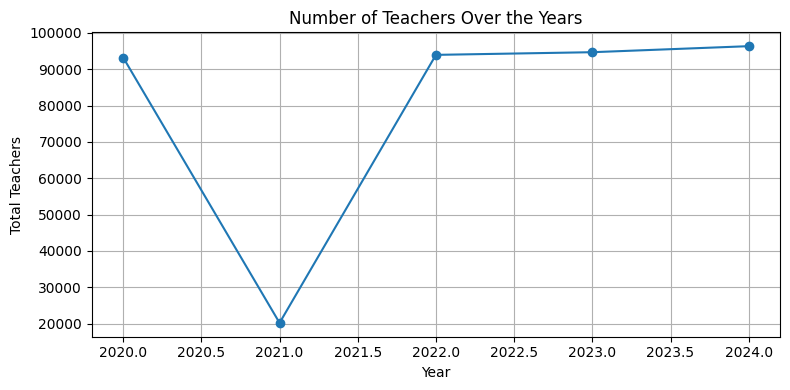

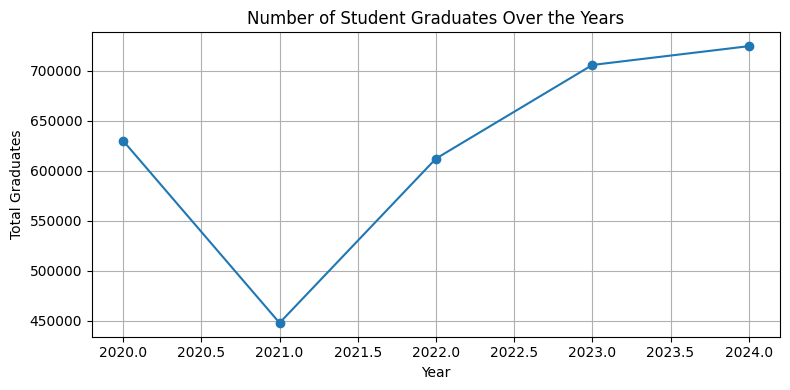

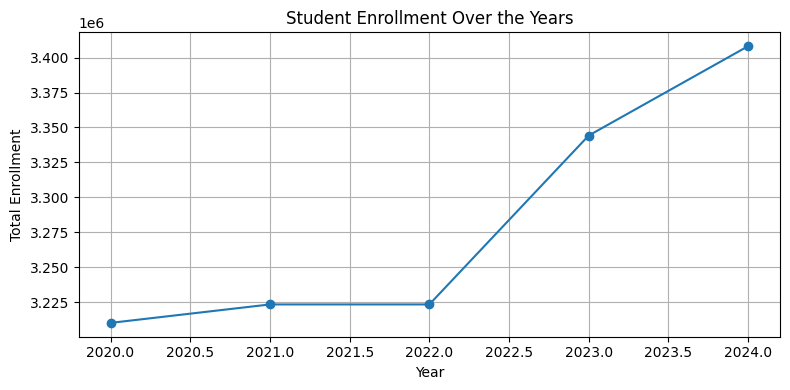

In [47]:

# ---------- YEARLY AGGREGATION & PLOTS ----------
# Aliases (extend as needed)
year_aliases = ["Year", "year", "AcademicYear", "Academic Year"]
enroll_aliases = ["Student_Enrollment", "Enrollment", "Enrollment_Total", "Student Enrollment", "Enrollment_Total_All"]
grad_aliases = ["Student Graduated", "Graduated", "Graduates", "Student_Graduated"]
teacher_aliases = [globals().get("teacher_col"), "Teachers", "Total_Teacher", "TeachingStaff_Total", "Teachers_Total"]

def pick_col(candidates, cols):
    for c in candidates:
        if c and c in cols:
            return c
    return None

cols = df.columns
year_col_picked  = pick_col(year_aliases, cols)
enroll_col_pick  = pick_col(enroll_aliases, cols)
grad_col_picked  = pick_col(grad_aliases, cols)
teacher_col_pick = pick_col(teacher_aliases, cols)

group_aggs = {}
if teacher_col_pick: group_aggs[teacher_col_pick] = "sum"
if enroll_col_pick:  group_aggs[enroll_col_pick]  = "sum"
if grad_col_picked:  group_aggs[grad_col_picked]  = "sum"

if year_col_picked and group_aggs:
    yearly_data = df.groupby(year_col_picked).agg(group_aggs).reset_index()

    # Try to coerce year to numeric for clean plotting
    try:
        yearly_data[year_col_picked] = pd.to_numeric(yearly_data[year_col_picked], errors="coerce")
        yearly_data = yearly_data.sort_values(year_col_picked)
    except Exception:
        pass

    # Plot: Teachers over years
    if teacher_col_pick in yearly_data.columns:
        plt.figure(figsize=(8,4))
        plt.plot(yearly_data[year_col_picked], yearly_data[teacher_col_pick], marker='o')
        plt.title("Number of Teachers Over the Years")
        plt.xlabel("Year"); plt.ylabel("Total Teachers")
        plt.grid(True); plt.tight_layout(); plt.show()

    # Plot: Graduates over years
    if grad_col_picked and grad_col_picked in yearly_data.columns:
        plt.figure(figsize=(8,4))
        plt.plot(yearly_data[year_col_picked], yearly_data[grad_col_picked], marker='o')
        plt.title("Number of Student Graduates Over the Years")
        plt.xlabel("Year"); plt.ylabel("Total Graduates")
        plt.grid(True); plt.tight_layout(); plt.show()

    # Optional: Enrollment over years
    if enroll_col_pick and enroll_col_pick in yearly_data.columns:
        plt.figure(figsize=(8,4))
        plt.plot(yearly_data[year_col_picked], yearly_data[enroll_col_pick], marker='o')
        plt.title("Student Enrollment Over the Years")
        plt.xlabel("Year"); plt.ylabel("Total Enrollment")
        plt.grid(True); plt.tight_layout(); plt.show()
else:
    print("Yearly aggregation skipped. Missing either a 'Year' column or any of (Teachers/Enrollment/Graduates).")


In [48]:
MODEL_ALIASES = {
    "lr": "Linear Regression",
    "linear": "Linear Regression",
    "linearregression": "Linear Regression",
    "rf": "Random Forest",
    "randomforest": "Random Forest",
    "gb": "Gradient Boosting",
    "gbr": "Gradient Boosting",
    "svr": "SVR (RBF)",
    "mlp": "Neural Network",
    "nn": "Neural Network",
}

def _resolve_model_name(model_choice: str) -> str:
    key = model_choice.strip()
    if key in pipelines:
        return key
    low = key.lower()
    if low in MODEL_ALIASES and MODEL_ALIASES[low] in pipelines:
        return MODEL_ALIASES[low]
    # case-insensitive exact
    for k in pipelines.keys():
        if k.lower() == low:
            return k
    raise ValueError(f"Model '{model_choice}' not found. Available: {list(pipelines.keys())}")

def _pick_enroll_col():
    if enroll_col is not None:
        return enroll_col
    # fallback heuristic
    cands = [c for c in feature_cols if "enroll" in c.lower() or "student" in c.lower()]
    if not cands:
        raise ValueError("Could not infer enrollment column. Update `enroll_aliases`.")
    return cands[0]

def predict_teachers(province_name: str, enrollment_value: float, model_choice: str = "Linear Regression") -> float:
    model_name = _resolve_model_name(model_choice)
    mdl = pipelines[model_name]

    enroll_target_col = _pick_enroll_col()

    # Build single-row with EXACT feature columns
    X_new = pd.DataFrame({c: [np.nan] for c in feature_cols})

    # enforce dtypes for preprocessors
    for c in cat_cols:
        if c in X_new.columns:
            X_new[c] = X_new[c].astype("object")
    for c in num_cols:
        if c in X_new.columns:
            X_new[c] = X_new[c].astype("float64")

    # Fill known fields (province + enrollment)
    if province_col and province_col in X_new.columns and province_name is not None:
        X_new.at[0, province_col] = str(province_name)
    if enroll_target_col in X_new.columns:
        X_new.at[0, enroll_target_col] = float(enrollment_value)

    pred = mdl.predict(X_new)[0]  # imputers handle remaining np.nan
    return float(pred)

# ------- CLI (optional) -------
print("\n---  Teacher Prediction Tool ---")

# Provinces (as strings)
if province_col:
    provinces = sorted(pd.Series(df[province_col]).dropna().astype(str).unique().tolist())
    print("\nAvailable provinces:")
    print(", ".join(provinces))
else:
    provinces = []
    print("\nNo province column detected from aliases:", province_aliases)

print("\nAvailable models:")
print(", ".join(pipelines.keys()))
print("Tip: You can also use aliases like 'lr', 'rf', 'gb', 'svr', 'mlp'.")

# Province input with fuzzy match
if provinces:
    raw_prov = input("\nEnter province name (case-insensitive; close matches accepted): ").strip()
    if raw_prov == "":
        sys.exit("No province entered. Exiting.")
    prov_map = {p.lower(): p for p in provinces}
    province_input = prov_map.get(raw_prov.lower())
    if province_input is None:
        close = get_close_matches(raw_prov, provinces, n=1, cutoff=0.6)
        if close:
            yn = input(f"Did you mean '{close[0]}'? (y/n): ").strip().lower()
            province_input = close[0] if yn == "y" else None
    if province_input is None:
        sys.exit(f"Province '{raw_prov}' not recognized. Please pick from the list shown.")
else:
    province_input = None  # dataset might not have province

# Enrollment input
enrollment_str = input("Enter number of students enrolled: ").strip()
try:
    enrollment_input = float(enrollment_str)
    if enrollment_input < 0:
        raise ValueError
except Exception:
    sys.exit("Enrollment must be a non-negative number. Exiting.")

# Model input
model_choice_raw = input("Choose model (e.g., Linear Regression / Random Forest / SVR (RBF) / Neural Network): ").strip()
if model_choice_raw == "":
    model_choice_raw = "Linear Regression"

try:
    model_choice = _resolve_model_name(model_choice_raw)
except Exception as e:
    print(f"Warning: {e}")
    print("Falling back to 'Linear Regression'.")
    model_choice = "Linear Regression"

# Predict
try:
    pred = predict_teachers(province_input, enrollment_input, model_choice)
    print(f"\nPredicted number of teachers needed in {province_input if province_input else '[no-province]'} using [{model_choice}]: {pred:.2f}")
except Exception as e:
    print("\nPrediction failed.")
    raise


---  Teacher Prediction Tool ---

Available provinces:
Banteay Meanchey, Battambang, Kampong Cham, Kampong Chhnang, Kampong Speu, Kampong Thom, Kampot, Kandal, Kep, Koh Kong, Kratie, Mondul Kiri, Otdar Meanchey, Pailin, Phnom Penh, Preah Sihanouk, Preah Vihear, Prey Veng, Pursat, Ratanak Kiri, Siemreap, Stung Treng, Svay Rieng, Takeo, Tbaung Khmum

Available models:
Linear Regression, Random Forest, Gradient Boosting, SVR (RBF), Neural Network
Tip: You can also use aliases like 'lr', 'rf', 'gb', 'svr', 'mlp'.

Predicted number of teachers needed in Pursat using [Linear Regression]: 571.14
